## Predicting Zillow
By: Scott Schmidl, Data Scientist
12/25/2021

### Goal
The goal of this project is to understand what affects the price of a house on Zillow and predict, within a range, the price of a house.

### Description
I want to predict housing prices as accuractely as possible to help sellers and buyers maximize their quality of life.

### Initial Questions
<p>1) Does a correlation exist between square feet and price?</p>
<p>2) Is there a correlation between number of bathrooms and price?</p>
<p>3) Is there a correlation between number of bedroooms and price?</p>
<p>4) Do houses in Los Angeles cost more than Orange County or Ventura?</p>

### Data Dictionary
<table>
<thead><tr>
<th>Target</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td>home_tax_value</td>
<td>Home price</td>
</tr>
</tbody>
</table>

<table>
<thead><tr>
<th>Variable</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td>bedrooms</td>
<td>How many bedrooms are in a house</td>
</tr>
<tr>
<td>bathrooms</td>
<td>How many bathrooms are in a house</td>
</tr>
<tr>
<td>square_feet</td>
<td>Size of the house</td>
</tr>
<tr>
<td>year_built</td>
<td>Year in which the house was built</td>
</tr>
<tr>
<td>fips</td>
<td>County Code</td>
</tr>
<tr>
<td>county</td>
<td>County in which the house is located</td>
</tr>
</tbody>
</table>

### Wrangling Zillow
- To wrangle the Zillow data, I used the Zillow database in our MySQL server, and selected `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, `fips` for single famiy residences.
- Please see wrangle.py for full query details.
- Columns were renamed for readability.
- The percentage of rows that had na's was small enough that I felt comfortable dropping the rows.
- Houses that had zero bathrooms were dropped.
- Houses with a size under 200 square feet were dropped.
- I handled outliers by removeing a property outside of three standard deviations.
- The `taxamount` column was dropped due to it being a potential for data leakage.
- A `county` column was created from the `fips` codes.

In [2]:
# import Wrangle module
from wrangle import Wrangle

# instantiate Wrangle class and pull in data from csv or MySQL
train, validate, test = Wrangle().wrangle_zillow()

### Preparing Zillow
To get my X and y sets:
- Dropped the following columns: `home_tax_value`, `fips`, `year_built`, `county`.
- Scaled the data by fitting on the X training set only and transforming all three X datasets.

In [3]:
# import prepare and pandas module
from prepare import Prepare
import pandas as pd

# instaniate Prepare class and prepare data and  converts train, val, and test into X and y for machine learning.
p = Prepare()
(X_train, y_train), (X_val, y_val), (X_test, y_test) = p.get_Xy(train, validate, test)

# This step scales the data for easier use by the algorithms
X_train_scaled, X_val_scaled, X_test_scaled, _ = p.scaling(X_train, X_val, X_test)

### The Issue
- How have prices changed over the years and how well can we predict the prices?

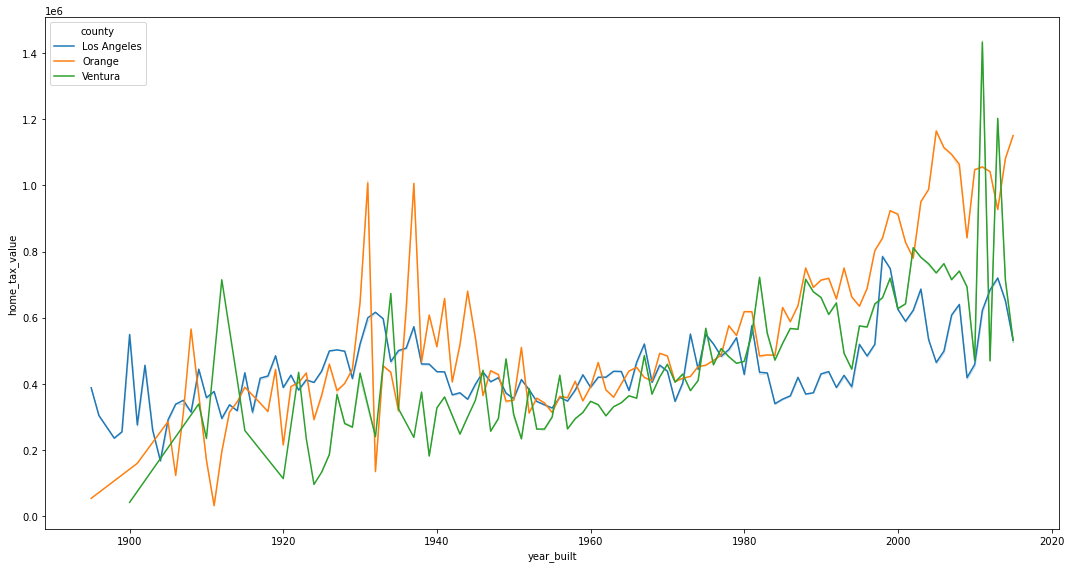

In [4]:
# import seaborn and matplotlib for visualizing
import seaborn as sns
import matplotlib.pyplot as plt

# plot year built vs price per county
plt.figure(figsize=(15, 8))
sns.lineplot(x="year_built", y="home_tax_value", hue="county", ci=False,  data=train);
plt.tight_layout();

#### Take Away
- Prices have in fact continued to increase over the years per county, albeit, at a somewhat "roller coaster" type rate.

### Exploratory Data Analysis
- Signifcance Level for each statistical test will be 0.05.

#### Question 1
- Does a correlation exist between square feet and price?

<p>H_o: There is no correlation between square feet and price.</p>
<p>H_a: There is a correlation between square feet and price.</p>

Pearson’s correlation coefficient: 0.54, P-Value: 0.0


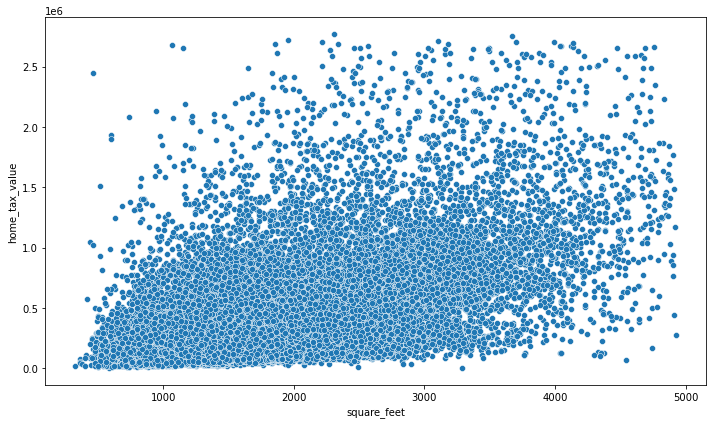

In [5]:
# plot square feet vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="square_feet", y="home_tax_value", data=train)
plt.tight_layout();

# Import pearsonr from  scipy.stats for statistical modeling
from scipy.stats import pearsonr

# get statistical test results from pearsonr
r, pvalue = pearsonr(train["square_feet"], train["home_tax_value"])
print(f"Pearson’s correlation coefficient: {round(r, 2)}, P-Value: {pvalue}")

#### Take Away
- With a P-Value of 0.0, which is less than the signifane level, I will reject the null hypothesis and say that there is a correlation between square feet and housing price.

#### Question 2
- Is there a correlation between number of bedrooms and price?

<p>H_o: There is no correlation between number of bedrooms and price.</p>
<p>H_a: There is a correlation between number of bedrooms and price.</p>

Pearson’s correlation coefficient: 0.24, P-Value: 0.0


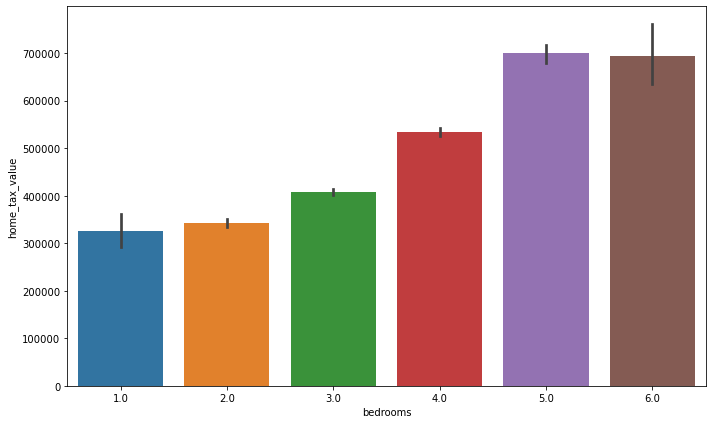

In [6]:
# plot bedrooms vs price
plt.figure(figsize=(10, 6))
sns.barplot(x="bedrooms", y="home_tax_value", data=train)
plt.tight_layout();

# get statistical test results from pearsonr
r, pvalue = pearsonr(train["bedrooms"], train["home_tax_value"])
print(f"Pearson’s correlation coefficient: {round(r, 2)}, P-Value: {pvalue}")

#### Take Away
- With a P-Value of 0.0, which is less than the signifane level, I will reject the null hypothesis and say that there is a correlation between bedrooms and housing price.

#### Question 3
- Is there a correlation between number of bathrooms and price?

<p>H_o: There is no correlation between number of bathrooms and price.</p>
<p>H_a: There is a correlation between number of bathrooms and price.</p>

Pearson’s correlation coefficient: 0.47, P-Value: 0.0


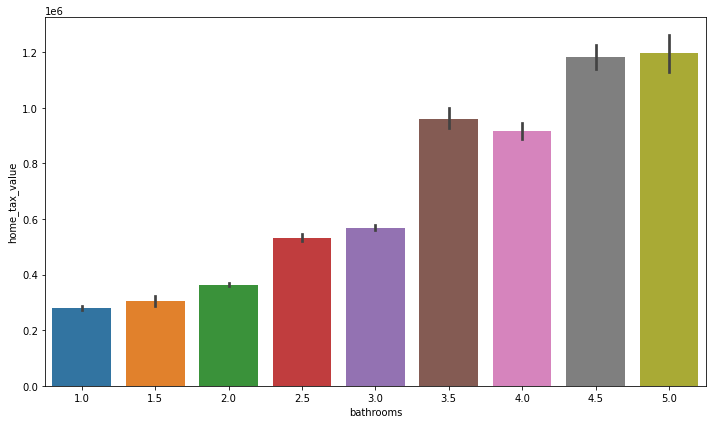

In [7]:
# plot bathrooms vs price
plt.figure(figsize=(10, 6))
sns.barplot(x="bathrooms", y="home_tax_value", data=train)
plt.tight_layout();

# get statistical test results from pearsonr
r, pvalue = pearsonr(train["bathrooms"], train["home_tax_value"])
print(f"Pearson’s correlation coefficient: {round(r, 2)}, P-Value: {pvalue}")

#### Take Away
- With a P-Value of 0.0, which is less than the signifane level, I will reject the null hypothesis and say that there is a correlation between bathrooms and housing price.

#### Question 4
- Do houses in Los Angeles cost more than Orange County or Ventura?

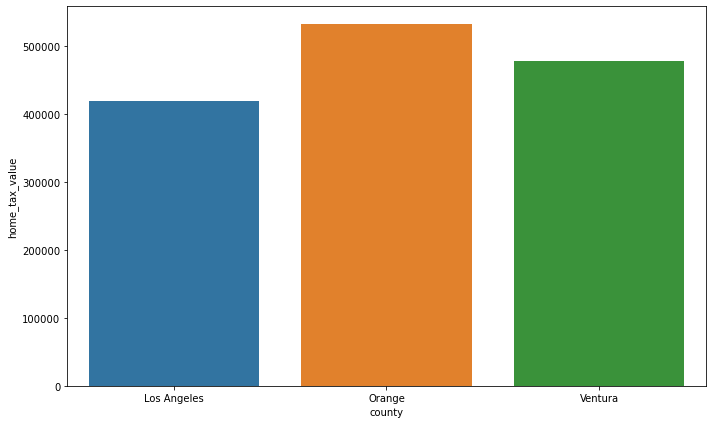

In [9]:
# plot county  vs price
plt.figure(figsize=(10, 6))
sns.barplot(x="county", y="home_tax_value", ci=False, data=train)
plt.tight_layout();

#### Take Away
- The mean price for houses in LA is less than Orange, which is number one, and Ventura, which is number two.

#### Key Take Aways
- Square footage is the number one driving factor of home prices.
- Bathrooms is the number two driving factor of home prices.
- Bedrooms is the number three driving factor of home prices.
- Orange County has the highest mean housing price.

### Predicting Zillow Housing Prices
- I will Linear Regression, Lasso Lars, and Tweedie Regressor. I will pick the best model using Root Mean Squared Error, because I am concerned with how close my models can predict to the actual price.

### Baseline
- My baseline prediction will be predicting the mean housing price and examining the residuals.

In [61]:
# import mean square error from sklearn
from sklearn.metrics import mean_squared_error

# create dataframe of y_train and add the baseline predictions to it.
act_pred_res = pd.DataFrame({"actual": y_train})
act_pred_res["baseline_prediction"] = act_pred_res["actual"].mean()

# get the RMSE for the actual prices and baseline predictions
baseline_rmse = mean_squared_error(act_pred_res["actual"], act_pred_res["baseline_prediction"] , squared=False)
print(f"Baseline RMSE: ${round(baseline_rmse, 2):,}")

Baseline RMSE: $386,069.73


### Models
- A grid search was performed on each algorithm to find the best hyper parameters. The Linear Regressor performed the best with a RMSE, on training, of \$318,897.31 and \$318,602.77, on validation.

In [33]:
# import linear models from sklearn
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

# fit linear models to scaled X train
lasso = LassoLars(alpha=1.0, normalize=False).fit(X_train_scaled, y_train)
tweedie = TweedieRegressor(power=1, alpha=1.0).fit(X_train_scaled, y_train)
lr = LinearRegression().fit(X_train_scaled, y_train)

In [34]:
# predict on scaled X train
lass_pred_train = lasso.predict(X_train_scaled)
tweed_pred_train = tweedie.predict(X_train_scaled)
lr_pred_train = lr.predict(X_train_scaled)

In [44]:
# get the RMSE of each linear model for the train data
tweed_rmse_train = mean_squared_error(y_train, tweed_pred_train, squared=False)
lassolars_rmse_train = mean_squared_error(y_train, lass_pred_train, squared=False)
linearreg_rmse_train = mean_squared_error(y_train, lr_pred_train, squared=False)
print(f"RMSE for train and Tweedie: ${round(tweed_rmse_train, 2):,}\nRMSE for train and Lasso Lars: ${round(lassolars_rmse_train, 2):,}\nRMSE for train and Linear Regression: ${round(linearreg_rmse_train, 2):,}")

RMSE for train and Tweedie: $319,198.01
RMSE for train and Lasso Lars: $318,897.31
RMSE for train and Linear Regression: $318,897.31


- The Linear Regression edged out the Lasso Lars by a very small amount.

In [41]:
# predict on scaled X validation
lass_pred_val = lasso.predict(X_val_scaled)
tweed_pred_val = tweedie.predict(X_val_scaled)
lr_pred_val = lr.predict(X_val_scaled)

In [45]:
# get the RMSE of each linear model for the validate data
tweed_rmse_validate = mean_squared_error(y_val, tweed_pred_val, squared=False)
lassolars_rmse_validate = mean_squared_error(y_val, lass_pred_val, squared=False)
linearreg_rmse_validate = mean_squared_error(y_val, lr_pred_val, squared=False)

print(f"RMSE for validate and Tweedie: ${round(tweed_rmse_validate, 2):,}\nRMSE for validate and Lasso Lars: ${round(lassolars_rmse_validate, 2):,}\nRMSE for validate and Linear Regression: ${round(linearreg_rmse_validate, 2):,}")

RMSE for validate and Tweedie: $318,701.71
RMSE for validate and Lasso Lars: $318,602.8
RMSE for validate and Linear Regression: $318,602.77


- Linear Regression performed the best on training and validate, and it does not appear to be overfit. I will test using the Linear Regression.

In [50]:
# predict on the scaled X test data for only linear regression
lr_pred_test = lr.predict(X_test_scaled)
linearreg_rmse_test = mean_squared_error(y_test, lr_pred_test, squared=False)
print(f"RMSE for test and Linear Regression: ${round(linearreg_rmse_test, 2):,}")

RMSE for test and Linear Regression: $315,197.87


### Conclusion
Using the Linear Regression model, with a RMSE of \$315,197.87, will need some work. While it was the lowest of the algorithms, that number is quite a large error and I would love to get it down to under \$100,000. Square footage is the number one driving factor for prices, bathrooms are the number two driving factor for prices, and bedrooms are the number three driving factor for prices. Orange County has the highest mean housing price.

### Recommendations and Next Steps
For my next steps and recommendations, I would like to make some more subsets of the data. For example, I would like to segment the prices into quartiles to make them easier to predict. I would also like to look at subsetting by square footage since that has the biggest impact on price. Furthermore, I would like to run my models with the unscaled versions. I will then rerun the machine learning models expecting to have my RMSE down under \$100,000.